# YOLO object detection (simple)
Run detection on a local image with a small pretrained YOLOv8 model.

In [1]:
# install once per environment
import sys, subprocess, pkgutil
if pkgutil.find_loader('ultralytics') is None:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', 'ultralytics'])
print('ultralytics ready')

ultralytics ready


In [3]:
# load YOLOv8n
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # small & fast pre-trained COCO model

In [6]:
# set your image path
image_path = r'C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_7\test_image.jpg'.replace('\\', '\\')  # change to your image
print('Using image:', image_path)

Using image: C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_7\test_image.jpg



image 1/1 C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_7\test_image.jpg: 384x640 6 persons, 1 bicycle, 8 cars, 1 motorcycle, 1 truck, 6 traffic lights, 195.1ms
Speed: 19.1ms preprocess, 195.1ms inference, 19.4ms postprocess per image at shape (1, 3, 384, 640)
image 1/1 C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_7\test_image.jpg: 384x640 6 persons, 1 bicycle, 8 cars, 1 motorcycle, 1 truck, 6 traffic lights, 195.1ms
Speed: 19.1ms preprocess, 195.1ms inference, 19.4ms postprocess per image at shape (1, 3, 384, 640)
person 0.83
car 0.80
car 0.75
bicycle 0.73
car 0.69
person 0.68
person 0.61
motorcycle 0.54
car 0.49
traffic light 0.48
car 0.46
traffic light 0.43
car 0.39
car 0.36
car 0.35
person 0.33
traffic light 0.33
traffic light 0.32
person 0.31
truck 0.31
person 0.30
traffic light 0.28
traffic light 0.27
person 0.83
car 0.80
car 0.75
bicycle 0.73
car 0.69
person 0.68
person 0.61
motorcycle 0.54
car 0.49
traffic light 0.48
car 0.46
traffic light 0.43
car 0.39
car 0.36
car 0

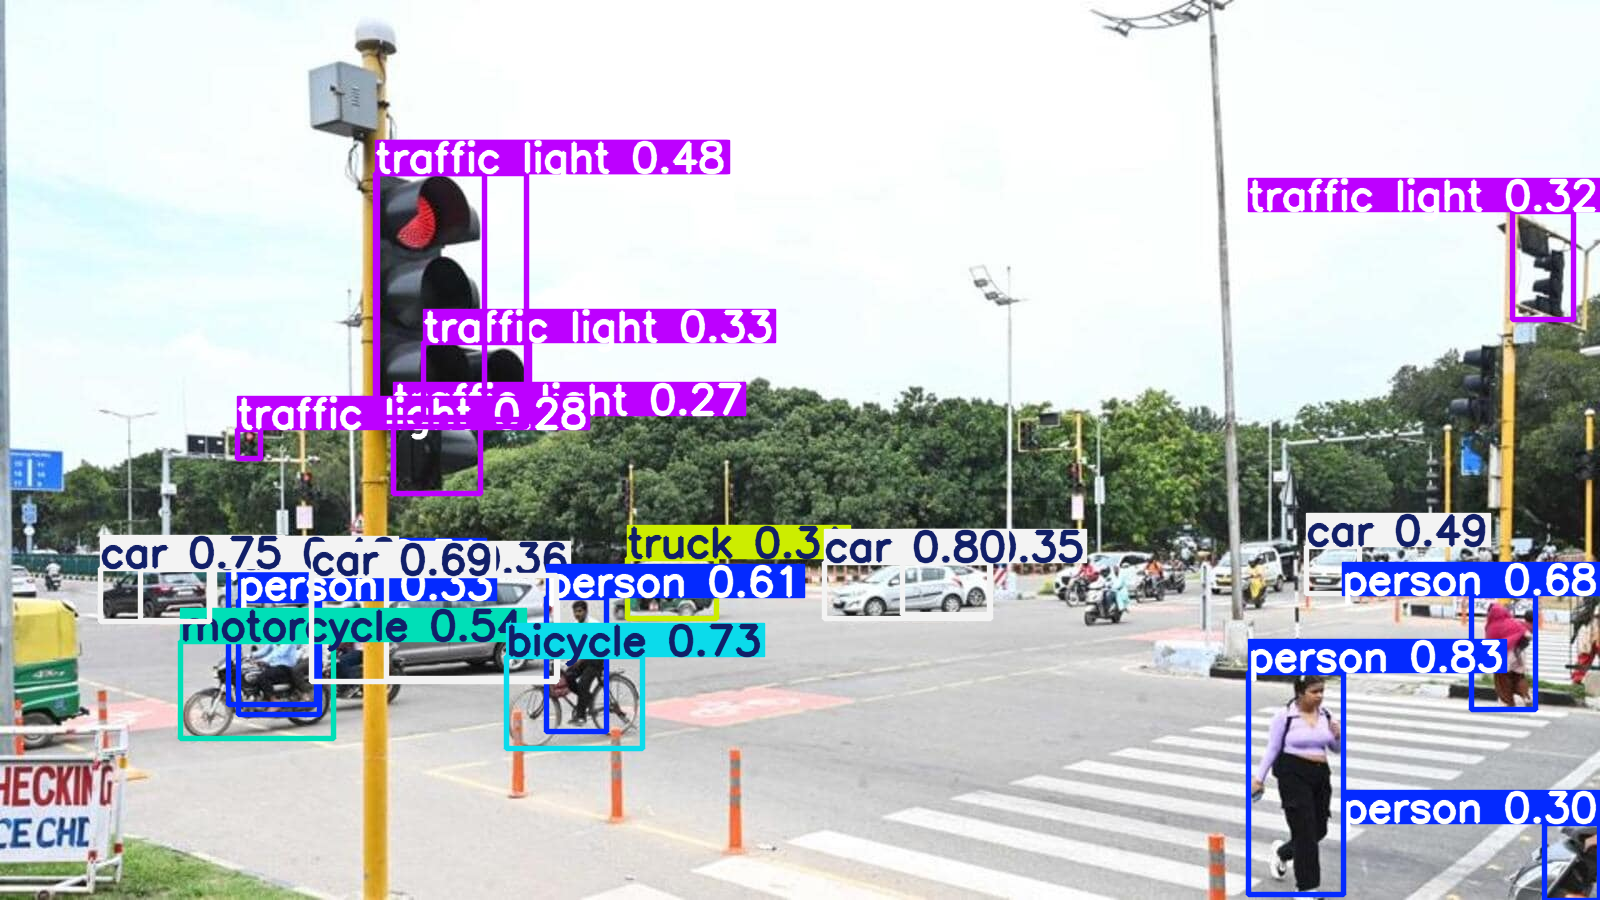

In [7]:
# detect
results = model(image_path)
res = results[0]

# print detections (label, confidence)
for b in res.boxes:
    cls = int(b.cls)
    conf = float(b.conf)
    print(model.names[cls], f"{conf:.2f}")

# show image with boxes (may open a window depending on environment)
try:
    res.show()
except Exception:
    pass

# save to file and display inline
out = res.plot()
import os, cv2
save_path = os.path.join(os.getcwd(), 'yolo_result.png')
cv2.imwrite(save_path, out)
print('Saved:', save_path)

from IPython.display import Image as IPImage, display
display(IPImage(filename=save_path))